# Movie Embeddings

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from data import dataset

movie_embed_table = dataset.load_dense_array(file="../data/latent_dnn_movie.npz")

print("shape", movie_embed_table.shape)
lens = np.sqrt(np.sum(a=movie_embed_table*movie_embed_table, axis=1))
print("max=", np.max(lens))
print("average=", np.mean(lens))
print("min=", np.min(lens))

plt.hist(x=lens, bins=20)

shape (9724, 8)
max= 47.187084
average= 3.1371455
min= 0.0


(array([5.826e+03, 2.034e+03, 8.050e+02, 4.180e+02, 2.300e+02, 1.450e+02,
        7.800e+01, 5.600e+01, 4.400e+01, 2.100e+01, 2.300e+01, 1.500e+01,
        6.000e+00, 9.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([ 0.       ,  2.3593543,  4.7187085,  7.0780625,  9.437417 ,
        11.796771 , 14.156125 , 16.51548  , 18.874834 , 21.234188 ,
        23.593542 , 25.952896 , 28.31225  , 30.671604 , 33.03096  ,
        35.390312 , 37.74967  , 40.10902  , 42.468376 , 44.82773  ,
        47.187084 ], dtype=float32),
 <a list of 20 Patch objects>)

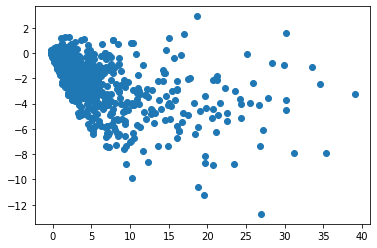

In [3]:
plt.scatter(x=movie_embed_table[:1000,0], y=movie_embed_table[:1000,1])

### Clusters

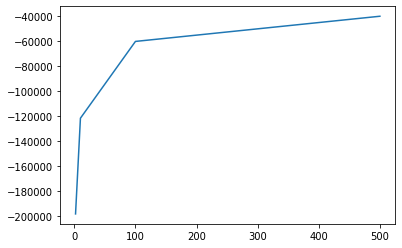

In [4]:
from sklearn.cluster import KMeans

candids_cluster_sizes = [2, 10, 100, 500]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=movie_embed_table[:1000])
    scores.append(kmeans_model.score(movie_embed_table))

plt.plot(candids_cluster_sizes, scores)


In [5]:
kmeans_model = KMeans(n_clusters=150, random_state=1).fit(X=movie_embed_table[:1000])
membership = kmeans_model.predict(X=movie_embed_table)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(movie_embed_table[:1000, :])

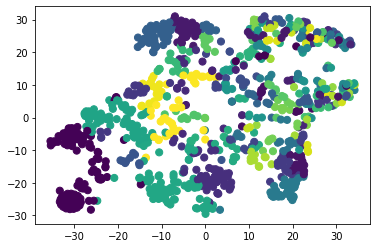

In [7]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership[:1000], s=50)

# User Embeddings

shape (610, 15)
max= 150.10248
average= 15.64789
min= 0.9980052


(array([238., 170.,  96.,  35.,  30.,  18.,   4.,   4.,   3.,   3.,   1.,
          1.,   0.,   3.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([  0.9980052,   8.453229 ,  15.908452 ,  23.363676 ,  30.8189   ,
         38.274124 ,  45.729347 ,  53.18457  ,  60.639793 ,  68.09502  ,
         75.55024  ,  83.00546  ,  90.460686 ,  97.91591  , 105.37114  ,
        112.82636  , 120.281586 , 127.73681  , 135.19203  , 142.64725  ,
        150.10248  ], dtype=float32),
 <a list of 20 Patch objects>)

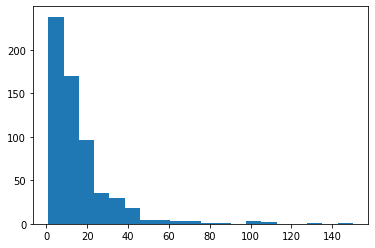

In [8]:
user_embed_table = dataset.load_dense_array(file="../data/latent_dnn_user.npz")

print("shape", user_embed_table.shape)
lens = np.sqrt(np.sum(a=user_embed_table*user_embed_table, axis=1))
print("max=", np.max(lens))
print("average=", np.mean(lens))
print("min=", np.min(lens))

plt.hist(x=lens, bins=20)

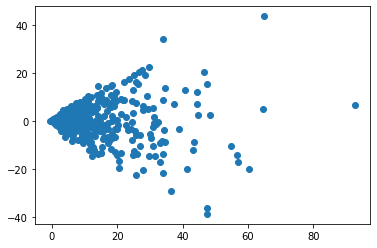

In [9]:
plt.scatter(x=user_embed_table[:,0], y=user_embed_table[:,1])

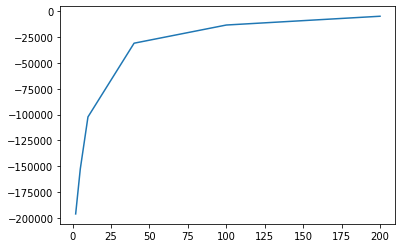

In [10]:
candids_cluster_sizes = [2, 5, 10, 40, 100, 200]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=user_embed_table)
    scores.append(kmeans_model.score(user_embed_table))

plt.plot(candids_cluster_sizes, scores)


In [11]:
kmeans_model = KMeans(n_clusters=100, random_state=1).fit(X=user_embed_table)
membership = kmeans_model.predict(X=user_embed_table)

In [12]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(user_embed_table)

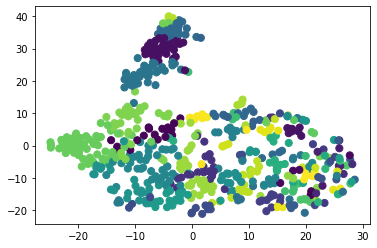

In [13]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership, s=50)

# Feature quality

## Cluster

num_features= 23


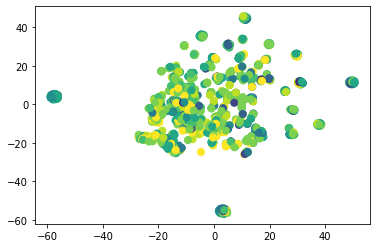

In [14]:
um_train = dataset.load_sparse_matrix(file="../data/raw_ratings_train.npz")
um_valid = dataset.load_sparse_matrix(file="../data/raw_ratings_valid.npz")

rating_true_train = um_train.data
rating_true_valid = um_valid.data

pairwise_input_train = np.concatenate((user_embed_table[um_train.row], movie_embed_table[um_train.col]), axis=1)
pairwise_input_valid = np.concatenate((user_embed_table[um_valid.row], movie_embed_table[um_valid.col]), axis=1)

print("num_features=", pairwise_input_train.shape[1])

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(pairwise_input_train[:1000, :])

plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=rating_true_train[:1000], vmin=0, vmax=5, s=50)

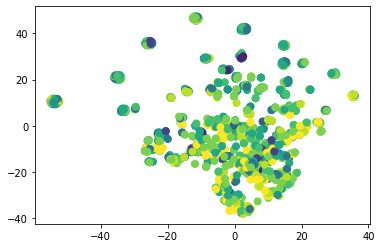

In [15]:
tsne = TSNE(n_components=2)
tsne_valid_x = tsne.fit_transform(pairwise_input_valid[:1000, :])

plt.scatter(x=tsne_valid_x[:,0], y=tsne_valid_x[:,1], c=rating_true_valid[:1000], vmin=0, vmax=5, s=50)

## User distances

### Universal user distance distribution

(array([381., 129.,  35.,  26.,  16.,   4.,   4.,   2.,   3.,   2.,   1.,
          0.,   0.,   3.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([  4.0037704,  11.05525  ,  18.10673  ,  25.15821  ,  32.20969  ,
         39.26117  ,  46.31265  ,  53.364132 ,  60.41561  ,  67.467094 ,
         74.51857  ,  81.57005  ,  88.62153  ,  95.67301  , 102.72449  ,
        109.77597  , 116.82745  , 123.87893  , 130.9304   , 137.98189  ,
        145.03337  ], dtype=float32),
 <a list of 20 Patch objects>)

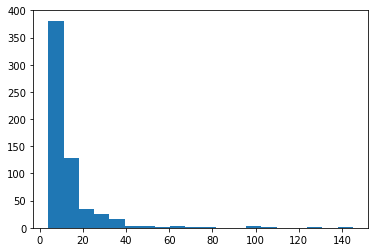

In [37]:
d = user_embed_table - np.mean(user_embed_table, axis=0)
dists = np.sqrt(np.sum(d*d, axis=1))
plt.hist(x=dists, bins=20)

### User distance deviations clustered by movie

In [41]:
dist_dev = list()
for movie_id in np.unique(ar=um_train.col):
    users = um_train.row[um_train.col == movie_id]
    user_vecs = user_embed_table[users]
    d = user_vecs - np.mean(user_vecs, axis=0)
    dists = np.sqrt(np.sum(d*d, axis=1))
    dist_dev.append(np.mean(dists))

(array([3159.,   74.,  169.,  249.,  301.,  459.,  598.,  567.,  471.,
         428.,  541.,  397.,  284.,  244.,  250.,  184.,   93.,   40.,
          49.,    5.]),
 array([ 0.       ,  4.495152 ,  8.990304 , 13.4854555, 17.980608 ,
        22.47576  , 26.970911 , 31.466063 , 35.961216 , 40.456367 ,
        44.95152  , 49.44667  , 53.941822 , 58.436974 , 62.932125 ,
        67.42728  , 71.92243  , 76.41758  , 80.912735 , 85.40788  ,
        89.90304  ], dtype=float32),
 <a list of 20 Patch objects>)

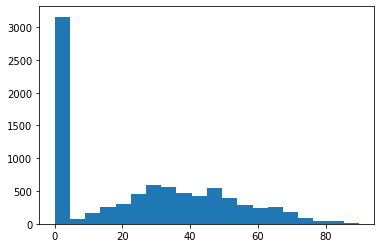

In [42]:
plt.hist(x=dist_dev, bins=20)

We can see that there are two modes. And the hypothesis can be: the first mode represents that we have movies that are only watched by similar users while the second mode respresents movies that are watched by the general audience.

## Movie distance variance clustered by user

### Universal movie distance distribution

(array([6.879e+03, 1.634e+03, 4.830e+02, 2.590e+02, 1.710e+02, 9.200e+01,
        5.600e+01, 4.700e+01, 2.600e+01, 2.100e+01, 2.300e+01, 5.000e+00,
        7.000e+00, 8.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([ 0.8099873,  3.0667672,  5.3235474,  7.5803275,  9.837108 ,
        12.093887 , 14.350667 , 16.607447 , 18.864227 , 21.121008 ,
        23.377787 , 25.634567 , 27.891348 , 30.148127 , 32.404907 ,
        34.661686 , 36.91847  , 39.175247 , 41.432026 , 43.68881  ,
        45.945587 ], dtype=float32),
 <a list of 20 Patch objects>)

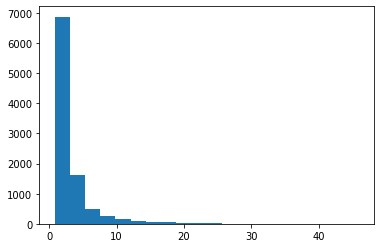

In [44]:
d = movie_embed_table - np.mean(movie_embed_table, axis=0)
dists = np.sqrt(np.sum(d*d, axis=1))
plt.hist(x=dists, bins=20)

In [45]:
dist_dev = list()
for user_id in np.unique(ar=um_train.row):
    movies = um_train.col[um_train.row == user_id]
    movie_vecs = movie_embed_table[movies]
    d = movie_vecs - np.mean(movie_vecs, axis=0)
    dists = np.sqrt(np.sum(d*d, axis=1))
    dist_dev.append(np.mean(dists))

(array([ 1.,  3.,  5.,  9., 16., 24., 32., 39., 72., 74., 78., 73., 64.,
        40., 24., 27., 17.,  7.,  2.,  3.]),
 array([ 2.9848711,  3.7174413,  4.4500113,  5.1825814,  5.9151516,
         6.647722 ,  7.380292 ,  8.112863 ,  8.845432 ,  9.578003 ,
        10.310573 , 11.043143 , 11.775713 , 12.508284 , 13.240853 ,
        13.973424 , 14.705994 , 15.438564 , 16.171135 , 16.903704 ,
        17.636274 ], dtype=float32),
 <a list of 20 Patch objects>)

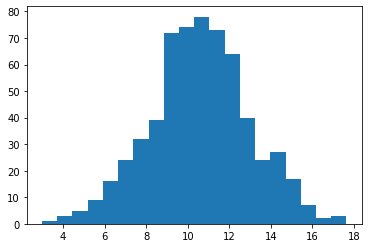

In [46]:
plt.hist(x=dist_dev, bins=20)

It's possible that users, on the other hand, watches all kinds of movies.